(9578, 14)
134092
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None
credit.policy        0
purpose          

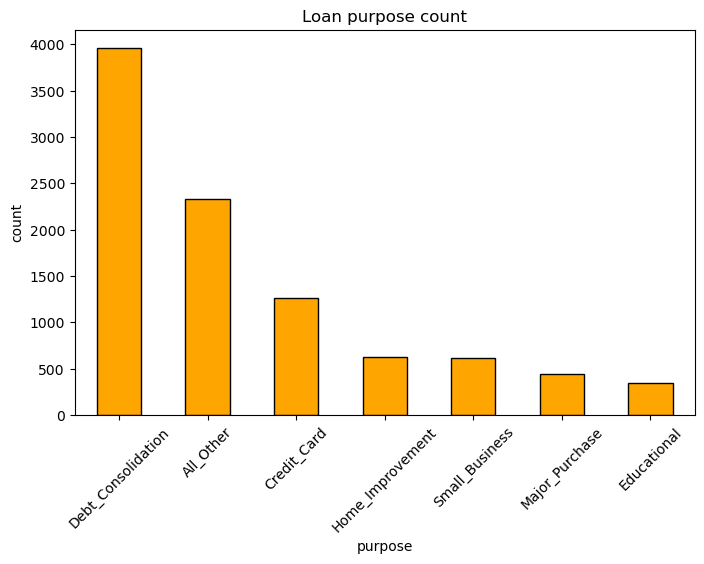

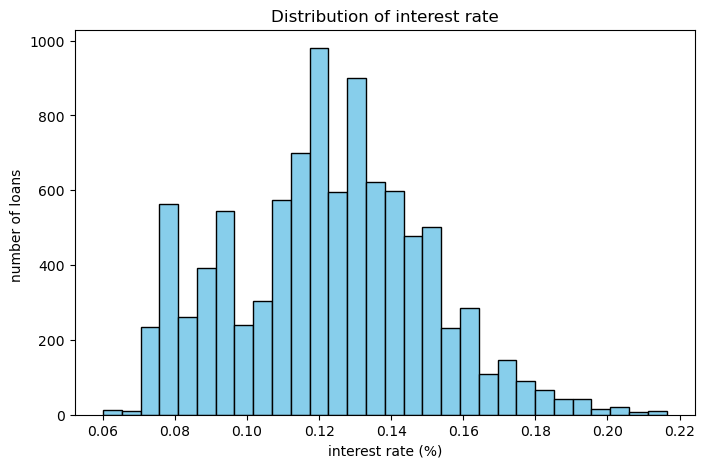

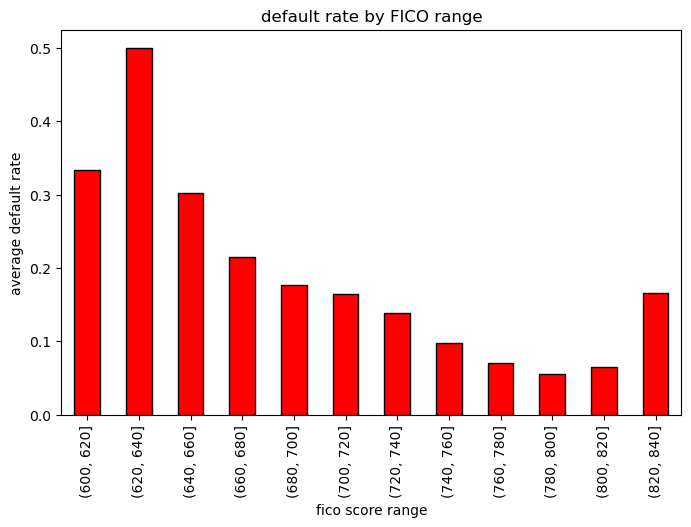

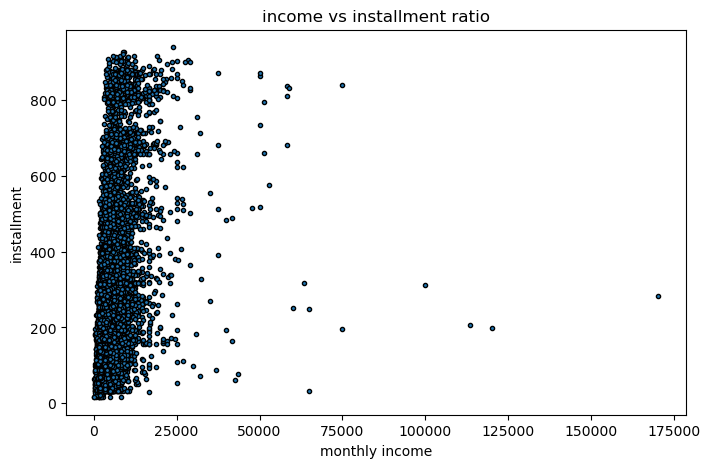

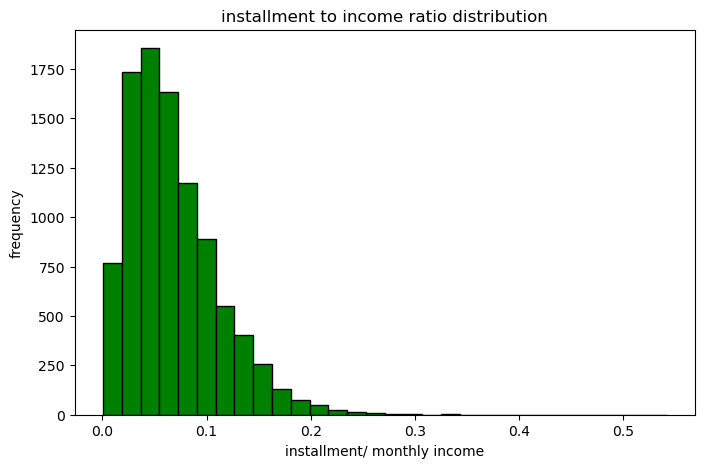

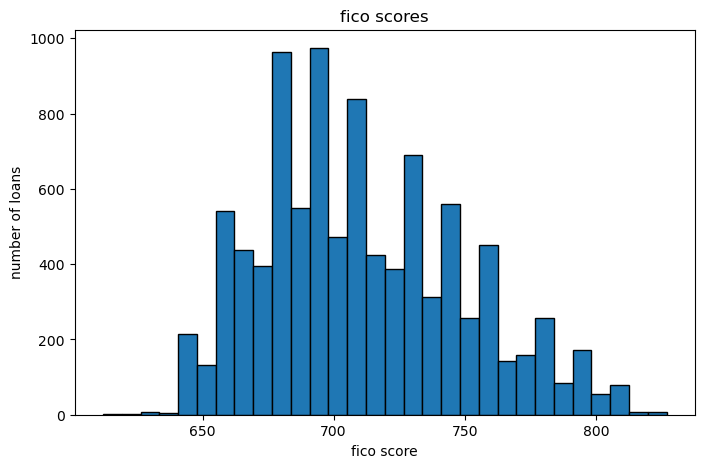

<Figure size 800x500 with 0 Axes>

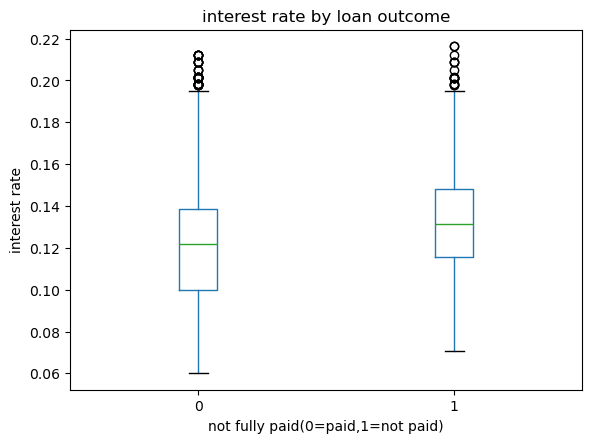

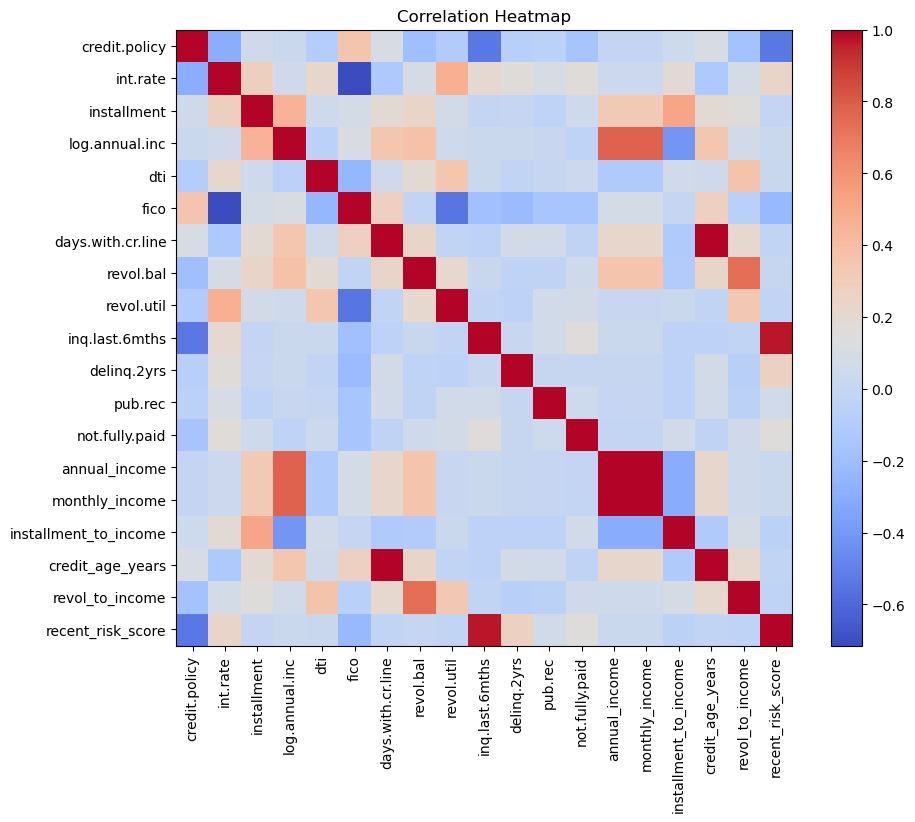

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv(r"C:\Users\welcome\OneDrive\Documents\leading.csv",low_memory=False)
df=pd.DataFrame(data)
print(df.shape)
print(df.size)
print(df.info())
for col in df.select_dtypes(include=['object']).columns:
    df[col]=df[col].fillna(df[col].mode()[0])
for col in df.select_dtypes(include=['number']).columns:
    df[col]=df[col].fillna(df[col].mean())
for col in df.select_dtypes(include=['object']).columns:
    df[col]=df[col].str.strip().str.title()
print(df.isnull().sum())
df=df.dropna()
print("duplicates:\n",df.duplicated().sum())
df=df.drop_duplicates()
for col in df.select_dtypes(include=['object']).columns:
    df[col]=df[col].astype('category')
print(df.head(10))
print(df.tail(10))
print(df.columns)
print(df.describe(include='category'))
#FEATURE ENGINEERING
df['annual_income']=np.exp(df['log.annual.inc'])
df['monthly_income']=df['annual_income']/12
df['installment_to_income']=df['installment'] / df['monthly_income']
df['credit_age_years']=df['days.with.cr.line'] / 365
df['revol_to_income']=df['revol.bal'] / df['annual_income']
def fico_score(x):
    if x<=850:
        return "excellent borrower"
    elif x<=799:
        return "very good ,low risk"
    elif x<=739:
        return "good, average"
    elif x<=669:
        return "fair,some risk"
    elif x<=579 and x>=300:
        return "poor,high risk"
    else:
        return "bad"
df['fico_category']=df['fico'].apply(fico_score)
df['recent_risk_score']=df['inq.last.6mths']+ df ['delinq.2yrs']
print(df)
plt.figure(figsize=(8,5))
df['purpose'].value_counts().plot(kind="bar",color="orange",edgecolor="black")
plt.title("Loan purpose count")
plt.xlabel("purpose")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(8,5))
plt.hist(df['int.rate'],bins=30,color='skyblue',edgecolor='black')
plt.title("Distribution of interest rate")
plt.xlabel("interest rate (%)")
plt.ylabel("number of loans ")
plt.show()
fico_bins=np.arange(600,855,20)
default_rate = df.groupby(pd.cut(df['fico'], fico_bins), observed=False)['not.fully.paid'].mean()
plt.figure(figsize=(8,5))
default_rate.plot(kind="bar",color='red',edgecolor='black')
plt.title("default rate by FICO range")
plt.xlabel("fico score range")
plt.ylabel("average default rate")
plt.show()
plt.figure(figsize=(8,5))
plt.scatter(df['monthly_income'],df['installment'],marker='.',edgecolor='black')
plt.xlabel("monthly income")
plt.ylabel("installment")
plt.title("income vs installment ratio")
plt.show()
plt.figure(figsize=(8,5))
plt.hist(df['installment_to_income'],bins=30,color="green",edgecolor="black")
plt.title("installment to income ratio distribution")
plt.xlabel("installment/ monthly income")
plt.ylabel("frequency")
plt.show()
plt.figure(figsize=(8,5))
plt.hist(df['fico'],bins=30,edgecolor='black')
plt.xlabel("fico score")
plt.ylabel("number of loans")
plt.title("fico scores")
plt.show()
plt.figure(figsize=(8,5))
df.boxplot(column='int.rate',by='not.fully.paid',grid= False)
plt.suptitle("")
plt.xlabel("not fully paid(0=paid,1=not paid)")
plt.ylabel("interest rate")
plt.title("interest rate by loan outcome")
plt.show()
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Correlation Heatmap")
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()
